In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('HR_comma_sep.csv')

# Basic Info
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None

First few rows:
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1        

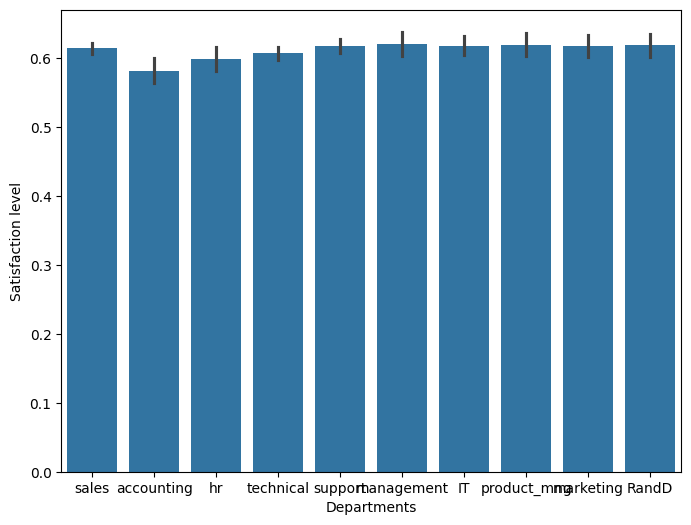

In [ ]:
plt.figure(figsize=(8, 6))
# sns.countplot(x='salary', hue='left', data=df)
sns.barplot(x='Department', y='satisfaction_level', data=df)

# plt.title('Salary vs Employee Retention')
plt.xlabel('Departments')
plt.ylabel('Satisfaction level')

plt.show()

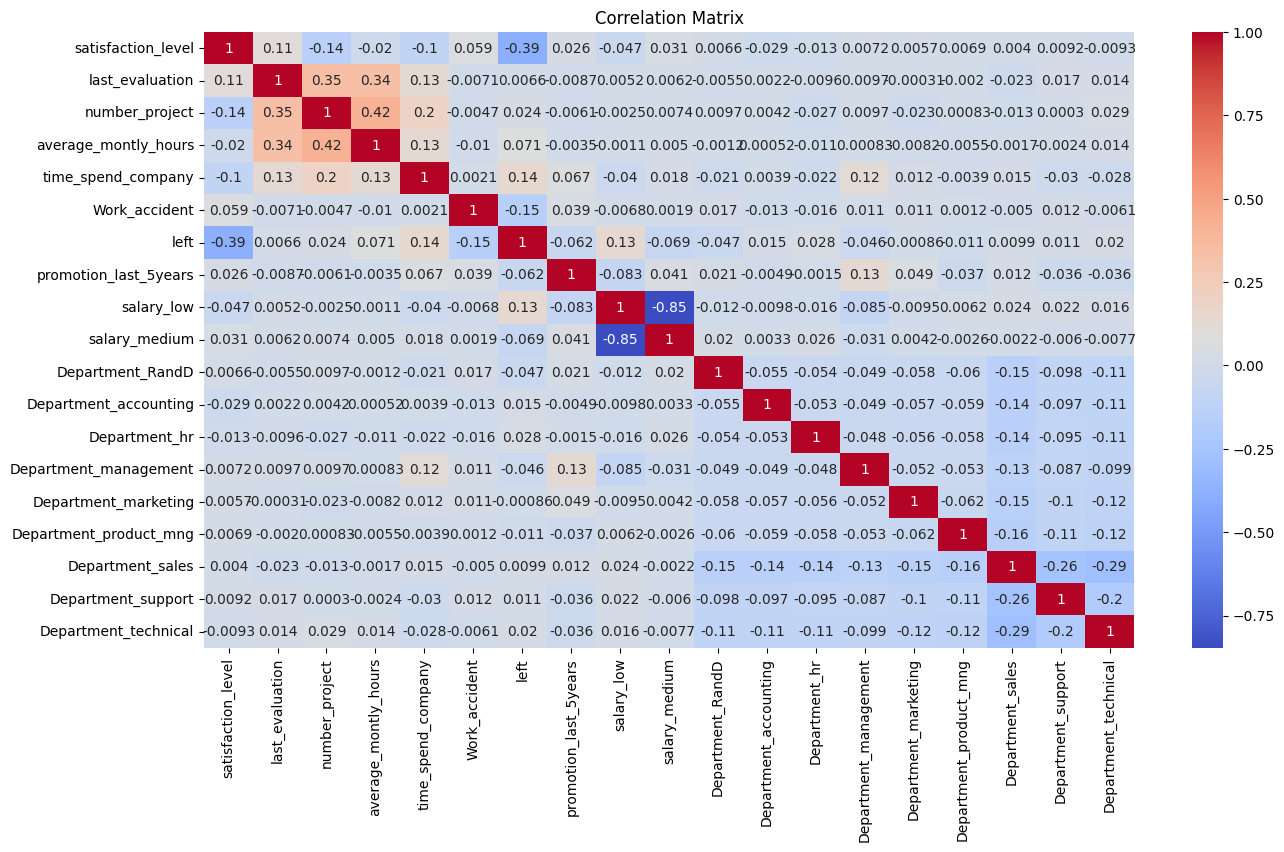

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Encode categorical variables (drop_first avoids dummy variable trap)
df_encoded = pd.get_dummies(df, columns=['salary', 'Department'], drop_first=True)

plt.figure(figsize=(15, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

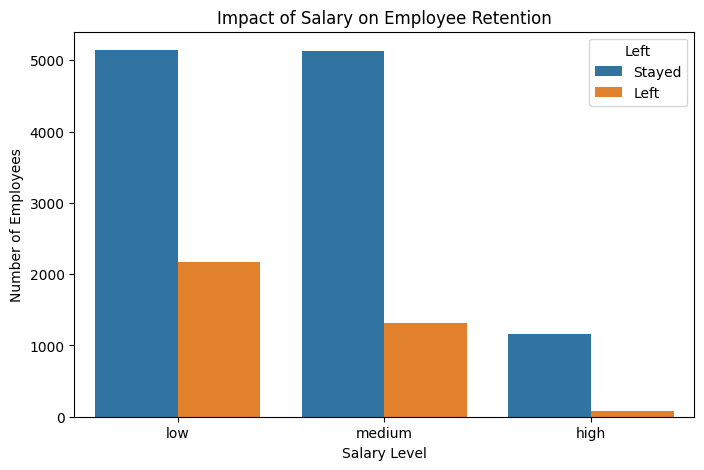

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='salary', hue='left', data=df, order=['low', 'medium', 'high'])

plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()

left                      1.000000
time_spend_company        0.144822
salary_low                0.134722
average_montly_hours      0.071287
Department_hr             0.028249
number_project            0.023787
Department_technical      0.020076
Department_accounting     0.015201
Department_support        0.010700
Department_sales          0.009923
last_evaluation           0.006567
Department_marketing     -0.000859
Department_product_mng   -0.011029
Department_management    -0.046035
Department_RandD         -0.046596
promotion_last_5years    -0.061788
salary_medium            -0.068833
Work_accident            -0.154622
satisfaction_level       -0.388375
Name: left, dtype: float64


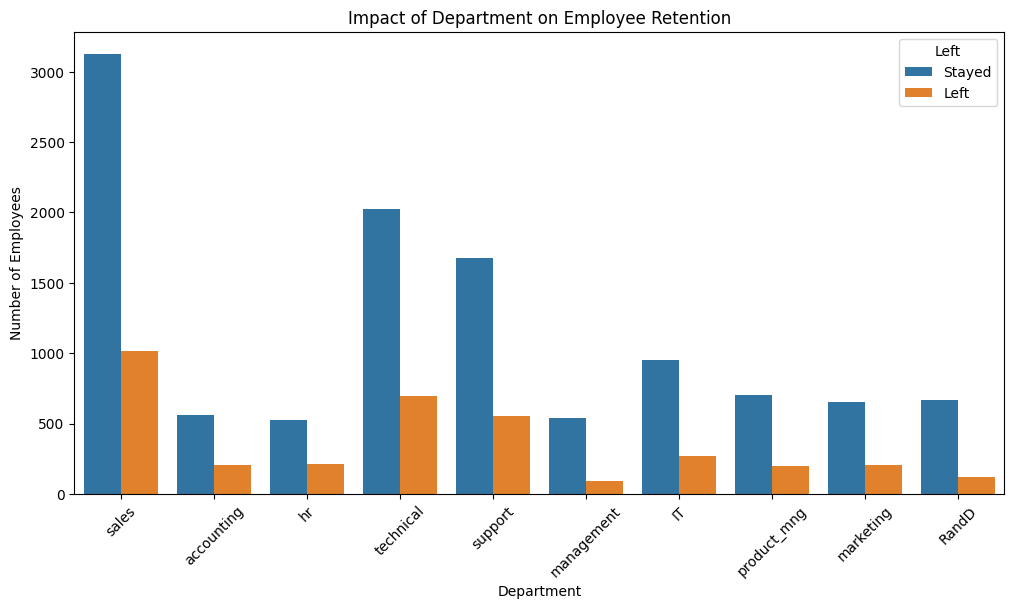

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Department', 'salary'], drop_first=True)

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Extract the correlation with 'left' (employee retention)
correlation_with_left = correlation_matrix['left'].sort_values(ascending=False)

# Display the correlation
print(correlation_with_left)
plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue='left', data=df)

# Title and labels
plt.title('Impact of Department on Employee Retention')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.xticks(rotation=45)  # Rotate department names for readability
plt.show()

In [ ]:
# Step 1: Preprocess the data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('HR_comma_sep.csv')

# Select important features and encode categorical variable
df_encoded = pd.get_dummies(df, columns=['salary'], drop_first=True)  # This encodes salary (low -> low salary column)

# Step 2: Define features (X) and target (y)
X = df_encoded[['satisfaction_level', 'time_spend_company', 'salary_low']]  # Using low salary as a feature
y = df_encoded['left']  # Target variable (whether the employee left or stayed)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 76.33%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2294
           1       0.49      0.25      0.33       706

    accuracy                           0.76      3000
   macro avg       0.65      0.58      0.59      3000
weighted avg       0.73      0.76      0.73      3000

